In [72]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import statistics

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tf.keras.callbacks import EarlyStopp



ModuleNotFoundError: No module named 'tf'

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fftshift
import os
from PIL import Image
from scipy.signal import spectrogram

In [73]:
path = "/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/data/dataset2/"

In [74]:
batch_size = 32
img_height = 96
img_width = 96

In [88]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1920 files belonging to 2 classes.
Using 1536 files for training.


In [89]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1920 files belonging to 2 classes.
Using 384 files for validation.


In [90]:
class_names = train_ds.class_names
print(class_names)

['Preictal', 'interictal']


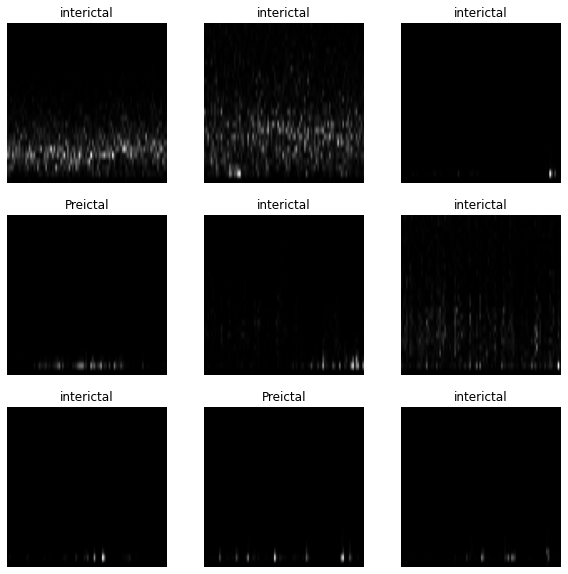

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [101]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.96508837


In [102]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(2, activation='softmax'),
])

In [103]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_15 (Rescaling)     (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)       

In [105]:
class_weight = {0: 1.,
                1: 10}

In [106]:
epochs=20
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  class_weight=class_weight,
  callbacks=[callback]
  
)

Epoch 1/20
48/48 [==============================] - 6s 116ms/step - loss: 2.2895 - accuracy: 0.7180 - val_loss: 0.9044 - val_accuracy: 0.7083
Epoch 2/20
48/48 [==============================] - 5s 97ms/step - loss: 1.1150 - accuracy: 0.7204 - val_loss: 0.9336 - val_accuracy: 0.7083
Epoch 3/20
48/48 [==============================] - 5s 97ms/step - loss: 0.9593 - accuracy: 0.7574 - val_loss: 1.1584 - val_accuracy: 0.7083
Epoch 4/20
48/48 [==============================] - 5s 98ms/step - loss: 0.9457 - accuracy: 0.7688 - val_loss: 0.5229 - val_accuracy: 0.7995
Epoch 5/20
48/48 [==============================] - 5s 98ms/step - loss: 0.8262 - accuracy: 0.7997 - val_loss: 0.6798 - val_accuracy: 0.7969
Epoch 6/20
48/48 [==============================] - 5s 98ms/step - loss: 0.7715 - accuracy: 0.7988 - val_loss: 0.4997 - val_accuracy: 0.8177
Epoch 7/20
48/48 [==============================] - 5s 99ms/step - loss: 0.7084 - accuracy: 0.8167 - val_loss: 0.6322 - val_accuracy: 0.8125
Epoch 8/20
4

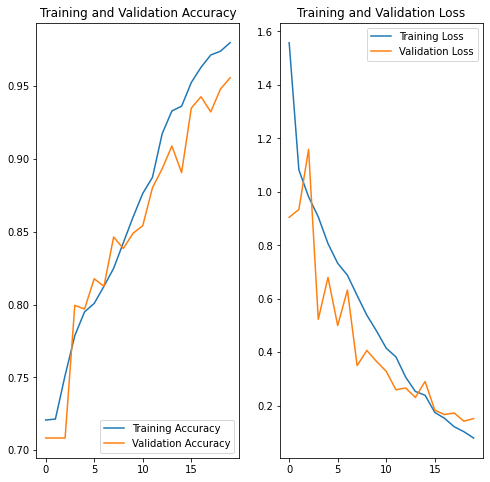

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [111]:
test1 = pd.read_csv("../Data/test_segment_1.csv")

In [112]:
test2 = pd.read_csv("../Data/test_segment_39.csv")

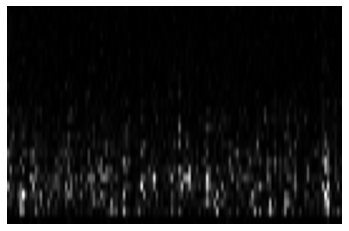

In [113]:
for i in range (0,15):
    arr = test2.iloc[i]
    f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
    plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
    plt.axis('off')
    plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/Data/Test1_inter/pre/img{i}.png', bbox_inches='tight',pad_inches = 0)

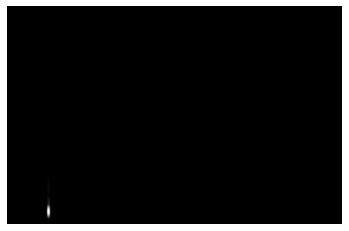

In [114]:
for i in range (0,15):
    arr = test1.iloc[i]
    f, t, Sxx = spectrogram(arr, fs=50, nperseg=256)
    plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
    plt.axis('off')
    plt.savefig(f'/Users/nicolasoederlin/code/jhupiterz/SafeSeizure/Data/Test1_inter/Inter/img{i}.png', bbox_inches='tight',pad_inches = 0)

In [115]:
path2 = "../Data/Test1_inter/"

In [116]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 2 classes.


In [117]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [124]:
model.predict(test_ds)

array([[0.01476775, 0.98523223],
       [0.01368013, 0.98631984],
       [0.01476775, 0.98523223],
       [0.01268305, 0.9873169 ],
       [0.01126543, 0.98873454],
       [0.01252513, 0.98747486],
       [0.01476753, 0.9852325 ],
       [0.01103055, 0.98896945],
       [0.01476425, 0.9852358 ],
       [0.0147669 , 0.9852331 ],
       [0.01076135, 0.9892386 ],
       [0.01476743, 0.9852326 ],
       [0.01476687, 0.9852331 ],
       [0.01476782, 0.98523223],
       [0.01476446, 0.9852356 ],
       [0.01102839, 0.98897153],
       [0.01476446, 0.9852356 ],
       [0.01308185, 0.98691815],
       [0.01476761, 0.98523235],
       [0.01476746, 0.9852326 ],
       [0.01142365, 0.98857635],
       [0.01088841, 0.9891116 ],
       [0.01476771, 0.98523235],
       [0.01476728, 0.9852327 ],
       [0.01290491, 0.9870952 ],
       [0.01310444, 0.9868955 ],
       [0.01145842, 0.9885416 ],
       [0.01317237, 0.9868276 ],
       [0.01077283, 0.9892272 ],
       [0.01476701, 0.985233  ]], dtype=flo

In [125]:
np.argmax(model.predict(test_ds),axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])